In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima

In [3]:
data=pd.read_csv('https://data.ibb.gov.tr/dataset/3ee6d744-5da2-40c8-9cd6-0e3e41f1928f/resource/db9c7fb3-e7f9-435a-92f4-1b917e357821/download/traffic_density_202001.csv')

In [4]:
data=data[data['GEOHASH']=='sxk9bk']
data

,DATE_TIME,LONGITUDE,LATITUDE,GEOHASH,MINIMUM_SPEED,MAXIMUM_SPEED,AVERAGE_SPEED,NUMBER_OF_VEHICLES
0,2020-01-03 13:00:00,28.844604,41.113586,sxk9bk,9,78,53,105
6042,2020-01-10 16:00:00,28.844604,41.113586,sxk9bk,12,90,55,83
8485,2020-01-14 03:00:00,28.844604,41.113586,sxk9bk,19,77,59,16
11710,2020-01-06 15:00:00,28.844604,41.113586,sxk9bk,12,78,53,131
14063,2020-01-22 18:00:00,28.844604,41.113586,sxk9bk,6,82,50,140
...,...,...,...,...,...,...,...,...
1321203,2020-01-21 18:00:00,28.844604,41.113586,sxk9bk,6,78,52,101
1322198,2020-01-04 15:00:00,28.844604,41.113586,sxk9bk,11,86,55,136
1323968,2020-01-11 08:00:00,28.844604,41.113586,sxk9bk,11,82,55,158
1325500,2020-01-19 12:00:00,28.844604,41.113586,sxk9bk,8,80,55,82


In [5]:
data=data[['DATE_TIME','NUMBER_OF_VEHICLES']]
data

,DATE_TIME,NUMBER_OF_VEHICLES
0,2020-01-03 13:00:00,105
6042,2020-01-10 16:00:00,83
8485,2020-01-14 03:00:00,16
11710,2020-01-06 15:00:00,131
14063,2020-01-22 18:00:00,140
...,...,...
1321203,2020-01-21 18:00:00,101
1322198,2020-01-04 15:00:00,136
1323968,2020-01-11 08:00:00,158
1325500,2020-01-19 12:00:00,82


In [6]:
data.dtypes

DATE_TIME             object
NUMBER_OF_VEHICLES     int64
dtype: object

In [8]:
data['DATE_TIME'] = pd.to_datetime(data['DATE_TIME'])
data.index=data['DATE_TIME']
data

C:\Users\Engin\AppData\Local\Temp/ipykernel_1068/3333086044.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['DATE_TIME'] = pd.to_datetime(data['DATE_TIME'])


,DATE_TIME,NUMBER_OF_VEHICLES
DATE_TIME,,
2020-01-03 13:00:00,2020-01-03 13:00:00,105
2020-01-10 16:00:00,2020-01-10 16:00:00,83
2020-01-14 03:00:00,2020-01-14 03:00:00,16
2020-01-06 15:00:00,2020-01-06 15:00:00,131
2020-01-22 18:00:00,2020-01-22 18:00:00,140
...,...,...
2020-01-21 18:00:00,2020-01-21 18:00:00,101
2020-01-04 15:00:00,2020-01-04 15:00:00,136
2020-01-11 08:00:00,2020-01-11 08:00:00,158


In [9]:
data=data.sort_index(axis=0)
data

,DATE_TIME,NUMBER_OF_VEHICLES
DATE_TIME,,
2020-01-01 00:00:00,2020-01-01 00:00:00,56
2020-01-01 01:00:00,2020-01-01 01:00:00,35
2020-01-01 02:00:00,2020-01-01 02:00:00,22
2020-01-01 03:00:00,2020-01-01 03:00:00,13
2020-01-01 04:00:00,2020-01-01 04:00:00,13
...,...,...
2020-01-31 19:00:00,2020-01-31 19:00:00,126
2020-01-31 20:00:00,2020-01-31 20:00:00,111
2020-01-31 21:00:00,2020-01-31 21:00:00,107


In [10]:
data1=data.drop(['DATE_TIME'],axis=1)

In [11]:
data1

,NUMBER_OF_VEHICLES
DATE_TIME,
2020-01-01 00:00:00,56
2020-01-01 01:00:00,35
2020-01-01 02:00:00,22
2020-01-01 03:00:00,13
2020-01-01 04:00:00,13
...,...
2020-01-31 19:00:00,126
2020-01-31 20:00:00,111
2020-01-31 21:00:00,107


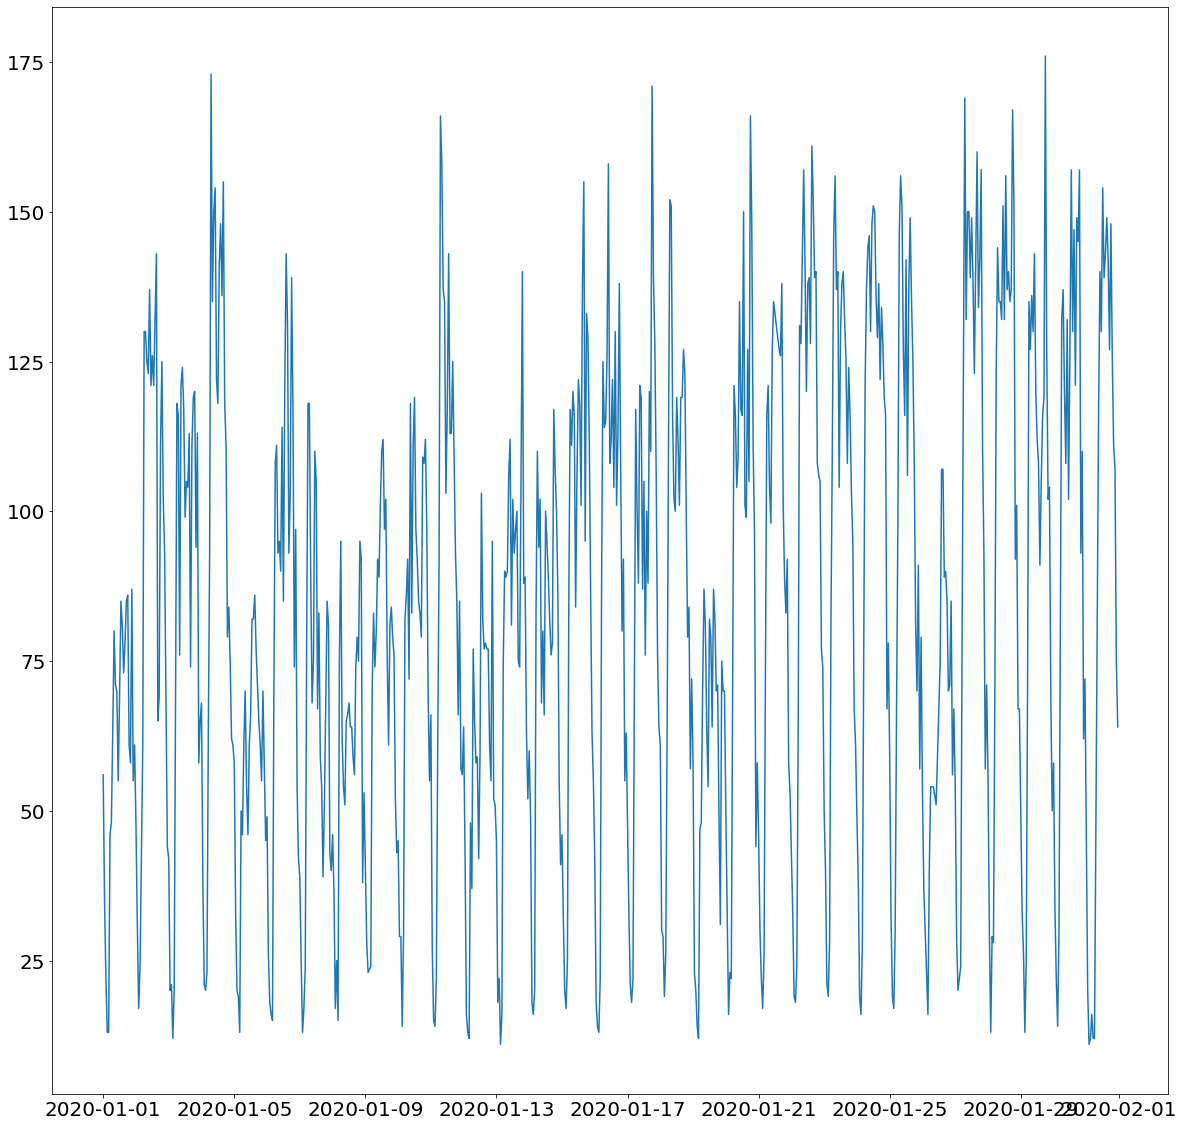

In [12]:
plt.figure(figsize=(20, 20))
plt.rcParams["font.size"] =20
plt.plot(data1)

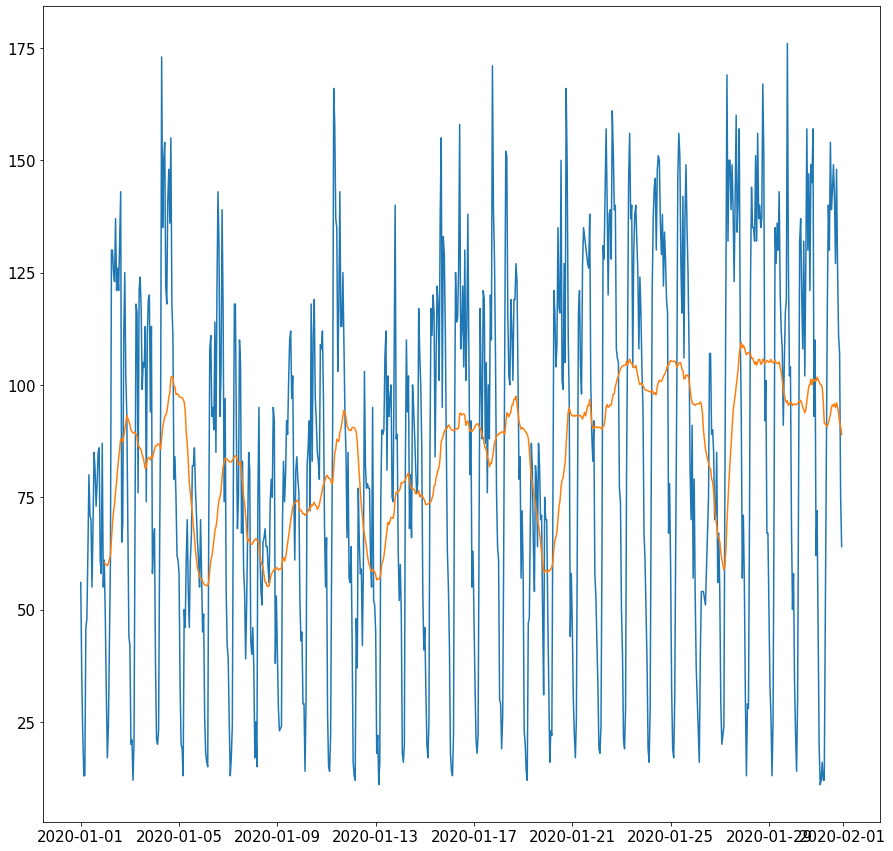

In [13]:
rol=data1.rolling(window=24).mean()
plt.figure(figsize=(15, 15))
plt.rcParams["font.size"] =15
plt.plot(data1)
plt.plot(rol)

In [14]:
rol

,NUMBER_OF_VEHICLES
DATE_TIME,
2020-01-01 00:00:00,NaN
2020-01-01 01:00:00,NaN
2020-01-01 02:00:00,NaN
2020-01-01 03:00:00,NaN
2020-01-01 04:00:00,NaN
...,...
2020-01-31 19:00:00,95.083333
2020-01-31 20:00:00,93.666667
2020-01-31 21:00:00,91.583333


In [15]:
rol1=rol.iloc[23:]
rol1

,NUMBER_OF_VEHICLES
DATE_TIME,
2020-01-01 23:00:00,60.458333
2020-01-02 00:00:00,60.125000
2020-01-02 01:00:00,59.958333
2020-01-02 02:00:00,59.750000
2020-01-02 03:00:00,60.208333
...,...
2020-01-31 19:00:00,95.083333
2020-01-31 20:00:00,93.666667
2020-01-31 21:00:00,91.583333


In [16]:
X = data1['NUMBER_OF_VEHICLES'].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -3.866094
p-value: 0.002299


In [17]:
result

(-3.8660939251002895,
 0.0022990421923864413,
 20,
 714,
 {'1%': -3.4395418285955563,
  '5%': -2.865596454500293,
  '10%': -2.5689301318958955},
 6351.689918795706)

In [18]:
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

	1%: -3.440
	5%: -2.866
	10%: -2.569


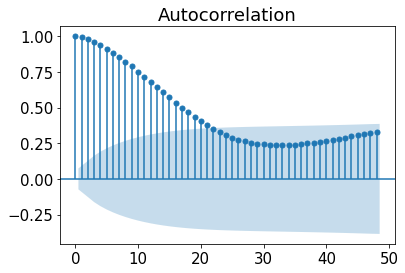

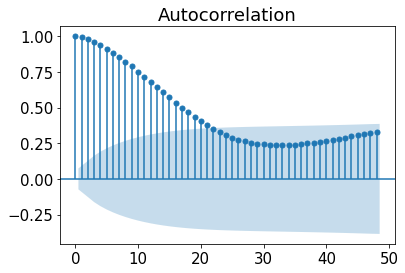

In [19]:
plot_acf(rol1['NUMBER_OF_VEHICLES'], lags= 48)

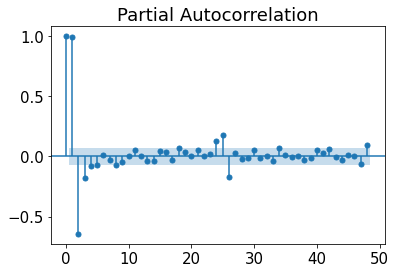

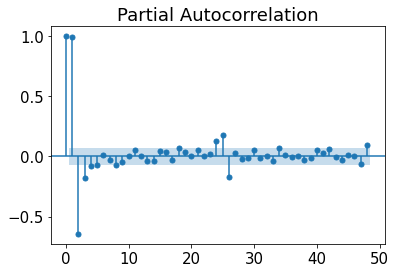

In [20]:
plot_pacf(rol1['NUMBER_OF_VEHICLES'], lags= 48)

In [21]:
dif = rol1['NUMBER_OF_VEHICLES'] - rol1['NUMBER_OF_VEHICLES'].shift(24)
dif1=dif.iloc[24:]
dif1=pd.DataFrame(dif1)
dif1

,NUMBER_OF_VEHICLES
DATE_TIME,
2020-01-03 00:00:00,30.708333
2020-01-03 01:00:00,29.875000
2020-01-03 02:00:00,29.625000
2020-01-03 03:00:00,29.625000
2020-01-03 04:00:00,29.000000
...,...
2020-01-31 19:00:00,-6.208333
2020-01-31 20:00:00,-6.333333
2020-01-31 21:00:00,-9.666667


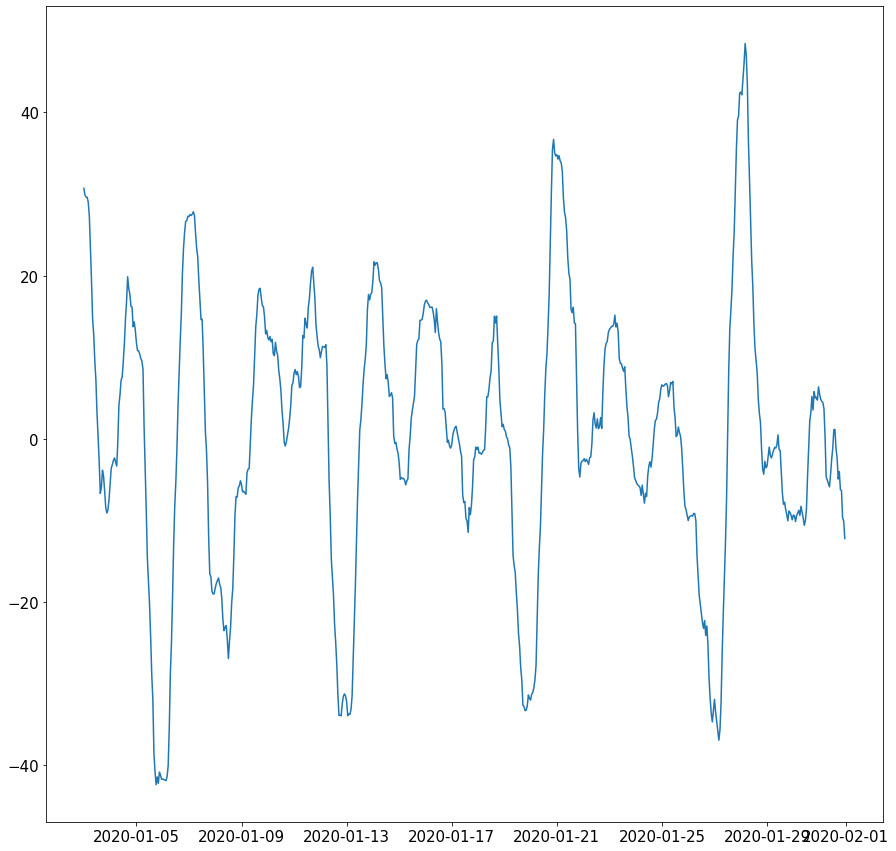

In [22]:
plt.figure(figsize=(15, 15))
plt.rcParams["font.size"] =15
plt.plot(dif1)

In [23]:
X = dif1['NUMBER_OF_VEHICLES'].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -6.833279
p-value: 0.000000


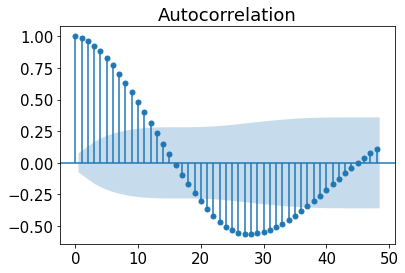

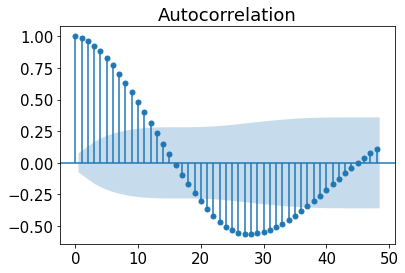

In [24]:
plot_acf(dif1['NUMBER_OF_VEHICLES'], lags= 48)

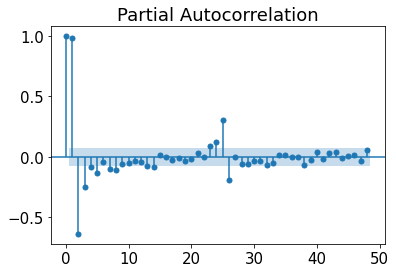

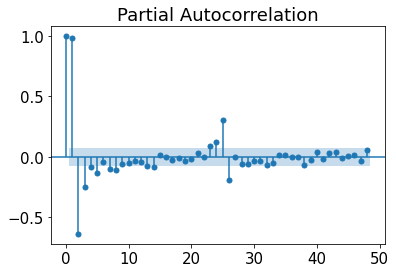

In [25]:
plot_pacf(dif1['NUMBER_OF_VEHICLES'], lags= 48)